# Lab 1: Deep Learning
## Universidad Santiago de Compostela

Students:
- Víctor Barreiro Domínguez
- Maximiliano Hormazábal Lagos


### Import libraries

In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

2023-01-30 10:33:27.327179: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


### Getting the MNIST dataset

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
# Loading the dataset in train and test sets
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape to transform it into array with 2 dimensions
n_samples_train,n_row,n_col = train_images.shape
n_samples_test,_,_ = test_images.shape
train_images = train_images.reshape((n_samples_train, n_row * n_col))
test_images = test_images.reshape((n_samples_test, n_row * n_col))

# Rescale of intensity of pixels in range (0,1) by dividing by the maximum intensity value
max_intensity = 255
train_images = train_images.astype('float32') / max_intensity
test_images = test_images.astype('float32') / max_intensity

### Why do we transform intensity values in a [0,1] range?

- Because values close to zero are more affordable for activation function.
- We can initialize the weigths correctly

The output of this neural network should be a "number decision" but the value is not a number itself but a category. That's why we need to convert it in a category using **One Hot Encoding**.

In [4]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
_,n_labels = train_labels.shape

## Neural Network Model

2023-01-30 10:33:29.223816: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-01-30 10:33:29.225012: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-01-30 10:33:29.671527: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-30 10:33:29.671744: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1650 Ti computeCapability: 7.5
coreClock: 1.485GHz coreCount: 16 deviceMemorySize: 3.82GiB deviceMemoryBandwidth: 178.84GiB/s
2023-01-30 10:33:29.671767: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-01-30 10:33:29.673322: I tensorflow/stream_executor/platform

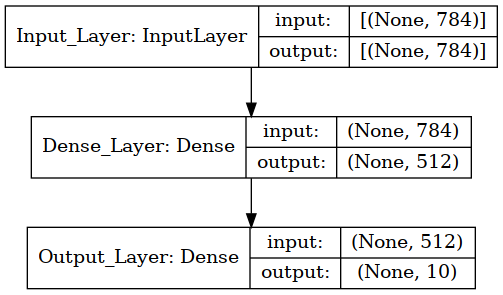

In [5]:
# Defining layers and model
input_layer = keras.layers.Input(shape=(n_row*n_col,),name = 'Input_Layer')
dense1_layer = keras.layers.Dense(512, activation="relu",name = 'Dense_Layer')(input_layer)
output_layer = keras.layers.Dense(n_labels, activation="softmax",name = 'Output_Layer')(dense1_layer)

model = keras.Model(inputs=input_layer, outputs=output_layer)

# Model compilation
optimizers = keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(optimizer=optimizers, loss="categorical_crossentropy",metrics=["accuracy"])
keras.utils.plot_model(model,show_shapes=True)

In [6]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (InputLayer)     [(None, 784)]             0         
_________________________________________________________________
Dense_Layer (Dense)          (None, 512)               401920    
_________________________________________________________________
Output_Layer (Dense)         (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


The number of parameters in the second line (401920) is the result of = (784 (input size) * 512 (neurons in the dense layer)) + 512 (number of biases, one for each neuron), that means the number of conections between layers. The third line is 512*10 + 20 for the same reason.

**Loss Function: ** Function to minimize, especifically cross-entropy means ** PENDIENTE **

**ITERATION:** Each time you modify the weigths.
**EPOCH:** Each time we use all of the training data.
**BATCH SIZE:** Amount of values to take into account in each iteration inside of an epoch.

**Questions**
¿Cuál es el significado del loss y accuracy de una época? Es el último valor o el promedio de todas??
¿Qué pasa si la división del total de los datos con batch size no es un entero? EL último set tiene una menor cantidad de valores? o se rellena con más valores???

In [7]:
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=5,restore_best_weights=True)
model.fit(train_images, train_labels, epochs=10, batch_size=128)
score = model.evaluate(test_images,test_labels)

2023-01-30 10:33:30.600333: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-01-30 10:33:30.624223: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2599990000 Hz


Epoch 1/10


2023-01-30 10:33:30.931226: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


469/469 [==============================] - 1s 2ms/step - loss: 0.6771 - accuracy: 0.8609
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1428 - accuracy: 0.9641
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1095 - accuracy: 0.9749
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0972 - accuracy: 0.9783
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0810 - accuracy: 0.9826
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0792 - accuracy: 0.9847
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0737 - accuracy: 0.9860
Epoch 8/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0607 - accuracy: 0.9885
Epoch 9/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0575 - accuracy: 0.9908
Epoch 10/10
313/313 [==============================] - 0s 1ms/step - loss: 0.2807 - accuracy: 0.9756


In [8]:
def buildModel(input_size, n_labels,optimizer = 'adam', learning_rate = 0.01, topology=[(512,"relu")]):
    """Function to generate MLPs according with the parameters. The models are designed for the image classification.

    Args:
        Input_size (int): Number of elements in the input.
        n_labels (int): Number of possible labels.
        optimizer (str, optional): Optimizer for trainning proxess. Defaults to 'adam'.
        learning_rate (float, optional): Step in the trainning process. Defaults to 0.01.
        topology (list, optional): List for specifies the topology of the network. One tuple in the list 
                                    for each leayer. Each tuple have to include the number of units and 
                                    the activation function. Defaults to [(512,"relu")].

    Returns:
        model: The object model compiled.
    """    

    print(input_size)

    # Defining layers and model
    input_layer = keras.layers.Input(shape=(input_size,),name = 'Input_Layer')
    previous_layer = input_layer
    for layer in topology:
        dense_layer = keras.layers.Dense(layer[0], activation=layer[1])(previous_layer)
        previous_layer = dense_layer
    output_layer = keras.layers.Dense(n_labels, activation="softmax",name = 'Output_Layer')(previous_layer)

    model = keras.Model(inputs=input_layer, outputs=output_layer)

    #Valid optimizers
    if(optimizer.lower() == 'adam'):
        opt = keras.optimizers.Adam(learning_rate=learning_rate)
    elif(optimizer.lower() == 'sgd'):
        opt = keras.optimizers.SGD(learning_rate=learning_rate)
    elif(optimizer.lower() == 'rmsprop'):
        opt = keras.optimizers.RMSprop(learning_rate=learning_rate)
    elif (optimizer.lower() == 'adamw'):
        opt = keras.optimizers.AdamW(learning_rate=learning_rate)
    elif (optimizer.lower() == 'adadelta'):
        opt = keras.optimizers.Adadelta(learning_rate=learning_rate)
    elif (optimizer.lower() == 'adagrad'):
        opt = keras.optimizers.Adagrad(learning_rate=learning_rate)
    elif (optimizer.lower() == 'adamax'):
        opt = keras.optimizers.Adamax(learning_rate=learning_rate)
    elif (optimizer.lower() == 'adafactor'):
        opt = keras.optimizers.Adafactor(learning_rate=learning_rate)
    elif (optimizer.lower() == 'nadam'):
        opt = keras.optimizers.Nadam(learning_rate=learning_rate)
    elif (optimizer.lower() == 'ftrl'):
        opt = keras.optimizers.Ftrl(learning_rate=learning_rate)
    else:
        print('Optimizer not properly defined')

    # Model compilation
    opt = keras.optimizers.RMSprop(learning_rate=learning_rate)
    model.compile(optimizer=opt, loss="categorical_crossentropy",metrics=["accuracy"])
    print(model.summary())
    keras.utils.plot_model(model,show_shapes=True)
    return model

def fitModel(model, train_images, train_labels, test_images, test_labels, epochs=10, batch_size=128, patience = 5):
    #callback = keras.callbacks.EarlyStopping(monitor='loss', patience = patience,restore_best_weights=True)
    model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size)
    score = model.evaluate(test_images,test_labels)
    return score

In [9]:
# Loading the dataset in train and test sets
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape to transform it into array with 2 dimensions
n_samples_train,n_row,n_col = train_images.shape
n_samples_test,_,_ = test_images.shape
train_images = train_images.reshape((n_samples_train, n_row * n_col))
test_images = test_images.reshape((n_samples_test, n_row * n_col))

# Rescale of intensity of pixels in range (0,1) by dividing by the maximum intensity value
max_intensity = 255
train_images = train_images.astype('float32') / max_intensity
test_images = test_images.astype('float32') / max_intensity

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
_,n_labels = train_labels.shape

In [10]:
model = buildModel(int(train_images.shape[1]), n_labels, optimizer = 'adam', learning_rate = 0.01, topology=[(512,"relu"),(512,"relu")])

784
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (InputLayer)     [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
Output_Layer (Dense)         (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
fitModel(model, train_images, train_labels, test_images, test_labels, 10, 128, 5)

Epoch 1/10
469/469 [==============================] - 1s 2ms/step - loss: 1.5764 - accuracy: 0.8210
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1950 - accuracy: 0.9513
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1681 - accuracy: 0.9612
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1528 - accuracy: 0.9653
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1546 - accuracy: 0.9673
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1361 - accuracy: 0.9714
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1342 - accuracy: 0.9736
Epoch 8/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1293 - accuracy: 0.9745
Epoch 9/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1215 - accuracy: 0.9767
Epoch 10/10
313/313 [==============================] - 0s 1ms/step - loss: 0.3369 - accuracy: 0.9548

[0.3369138240814209, 0.954800009727478]

In [12]:
topologies=[[(512,"relu"),(512,"relu")], [(128,"relu")], [(512,"sigmoid"),(512,"sigmoid")], [(1024,"relu"),(1024,"relu")]]
results = []
for topology in topologies:
    model = buildModel(train_images.shape[1], n_labels, optimizer = 'adam', learning_rate = 0.01, topology=topology)
    result = fitModel(model, train_images, train_labels, test_images, test_labels, 10, 128, 5)
    results.append(result)

784
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (InputLayer)     [(None, 784)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
Output_Layer (Dense)         (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
469/469 [==============================] - 1s 2ms/step - loss: 2.1265 - accuracy: 0.8236
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1843 - accuracy: 0.9535
Epoch 3/10
469/469 [======================

In [13]:
for i in range(len(topologies)):
    print(topologies[i])
    print(results[i])

[(512, 'relu'), (512, 'relu')]
[0.2632893919944763, 0.9642999768257141]
[(128, 'relu')]
[0.1897825002670288, 0.9769999980926514]
[(512, 'sigmoid'), (512, 'sigmoid')]
[0.2016012817621231, 0.9758999943733215]
[(1024, 'relu'), (1024, 'relu')]
[0.299828439950943, 0.9681000113487244]


In [14]:
from tensorflow.keras.datasets import cifar10

# Loading the dataset in train and test sets
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Reshape to transform it into array with 2 dimensions
n_samples_train,n_row,n_col,color = train_images.shape
n_samples_test,_,_,_ = test_images.shape
train_images = train_images.reshape((n_samples_train, n_row * n_col * color))
test_images = test_images.reshape((n_samples_test, n_row * n_col * color))

# Rescale of intensity of pixels in range (0,1) by dividing by the maximum intensity value
max_intensity = 255
train_images = train_images.astype('float32') / max_intensity
test_images = test_images.astype('float32') / max_intensity

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
_,n_labels = train_labels.shape

In [15]:
topologies=[[(512,"relu"),(512,"relu")], [(128,"relu")], [(512,"sigmoid"),(512,"sigmoid")], [(1024,"relu"),(1024,"relu")]]
results = []
for topology in topologies:
    model = buildModel(train_images.shape[1], n_labels,optimizer = 'adam', learning_rate = 0.01, topology=topology)
    result = fitModel(model, train_images, train_labels, test_images, test_labels, 10, 128, 5)
    print("Topology: " + str(topology))
    results.append(result)

3072
Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (InputLayer)     [(None, 3072)]            0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
Output_Layer (Dense)         (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
391/391 [==============================] - 2s 5ms/step - loss: 28.7608 - accuracy: 0.1027
Epoch 2/10
391/391 [==============================] - 2s 4ms/step - loss: 2.3427 - accuracy: 0.0996
Epoch 3/10
391/391 [================

In [16]:
for i in range(len(topologies)):
    print(topologies[i])
    print(results[i])

[(512, 'relu'), (512, 'relu')]
[2.3031530380249023, 0.10000000149011612]
[(128, 'relu')]
[1.994344711303711, 0.24819999933242798]
[(512, 'sigmoid'), (512, 'sigmoid')]
[2.2744340896606445, 0.1526000052690506]
[(1024, 'relu'), (1024, 'relu')]
[2.065971612930298, 0.19189999997615814]
